# Alli Khadga Jyoth 19024 DSE
# ENDSEM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage


## Q15

In [2]:
M = np.array([
    [0.7679, - 0.4938, -0.0234, 0.0067],
    [-0.0852, -0.0915, -0.9065, -0.0878],
    [0.1827,0.2988,-0.0742,1.000]
])

In [3]:
H = M[:,:3]
h = M[:,3].reshape(3,1)
H_inv = np.linalg.inv(H)
H_inv

array([[ 0.93072703, -0.14626022,  1.49334069],
       [-0.57636511, -0.1766679 ,  2.3401131 ],
       [-0.02930009, -1.07156483, -0.37656147]])

In [4]:
R_T,K_inv = np.linalg.qr(H_inv)
R_T

array([[-0.84987872, -0.13141145, -0.51033048],
       [ 0.52629872, -0.16249257, -0.83462915],
       [ 0.02675492, -0.97791983,  0.20726065]])

In [5]:
K_inv

array([[-1.09512923e+00,  2.65373217e-03, -4.76348136e-02],
       [ 0.00000000e+00,  1.09583198e+00, -2.08246122e-01],
       [ 0.00000000e+00,  0.00000000e+00, -2.79327026e+00]])

In [6]:
K = np.linalg.inv(K_inv)
K = K/K[2,2]
K ,'Intrinsic Martix'

(array([[ 2.55063072, -0.00617676, -0.04303648],
        [-0.        , -2.54899501,  0.19003472],
        [ 0.        ,  0.        ,  1.        ]]),
 'Intrinsic Martix')

In [8]:
t = K_inv@h
t

array([[-0.05520518],
       [-0.30446017],
       [-2.79327026]])

## Q19

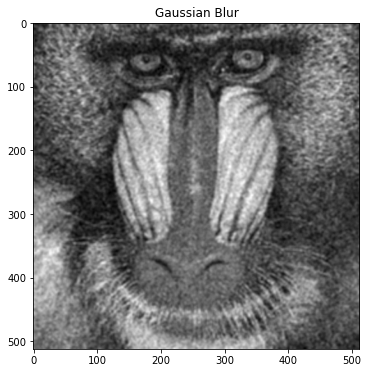

In [39]:
img = cv2.imread('baboon.tiff')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gauss_img = cv2.GaussianBlur(img,(5,5),2)
plt.figure(figsize = (16,6))
plt.subplot(121),plt.imshow(gauss_img,cmap ='gray'),plt.title('Gaussian Blur')

plt.show()

(<AxesSubplot:title={'center':'Corners'}>,
 Text(0.5, 1.0, 'Corners'))

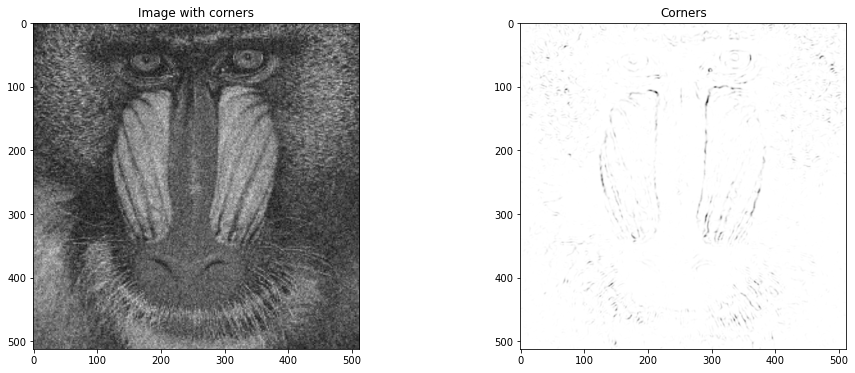

In [41]:
import cv2 as cv
gray = np.float32(gauss_img)
plt.figure(figsize = (16,6))
dst = cv.cornerHarris(gray,2,3,0.7)
#result is dilated for marking the corners, not important
# dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[255]
# plt.imshow(img,'gray')
plt.subplot(121),plt.imshow(img,cmap ='gray'),plt.title('Image with corners')
plt.subplot(122),plt.imshow(dst,cmap = 'gray'),plt.title('Corners')


### Explaination is in the written sheet

## Q21

In [42]:
from skimage.measure import label, regionprops

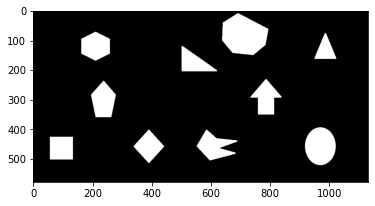

In [43]:
img = cv2.imread('binaryshapes.png',cv2.IMREAD_GRAYSCALE)
ret1,thresh_img = cv2.threshold(img,100,1,cv2.THRESH_BINARY)
plt.imshow(img ,cmap ='gray')
plt.show()

No. of components is :  10


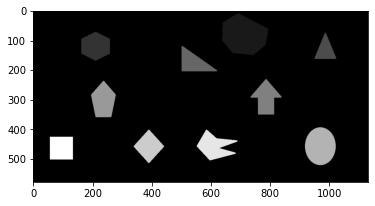

In [44]:
labelled_img,labels = label(thresh_img,connectivity=2,return_num=True) #  for 8 Neighborhood connectivity=2 
print("No. of components is : ",labels)
plt.imshow(labelled_img ,cmap ='gray')
plt.show()

Centroid: (81.55491618714035, 712.1126469852389)
BBox (7, 639, 149, 796)
__________
Centroid: (118.5, 211.0)
BBox (70, 163, 168, 260)
__________
Centroid: (130.93626750500144, 987.5261503286654)
BBox (74, 951, 162, 1025)
__________
Centroid: (174.04909420289854, 543.1807971014492)
BBox (118, 502, 204, 622)
__________
Centroid: (294.4080442583732, 787.0109150717703)
BBox (230, 735, 350, 840)
__________
Centroid: (303.2117210070161, 237.58206080616316)
BBox (236, 196, 359, 280)
__________
Centroid: (456.5222381635581, 970.5423242467718)
BBox (393, 919, 521, 1023)
__________
Centroid: (457.03032311516154, 391.0245236122618)
BBox (401, 340, 514, 443)
__________
Centroid: (457.21307439824943, 612.2175875273523)
BBox (401, 553, 505, 691)
__________
Centroid: (463.0, 95.5)
BBox (425, 57, 502, 135)
__________


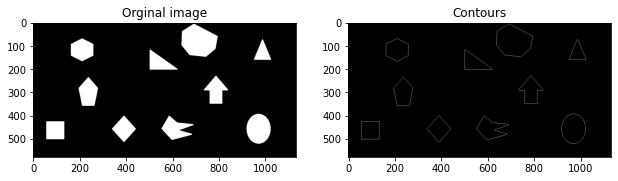

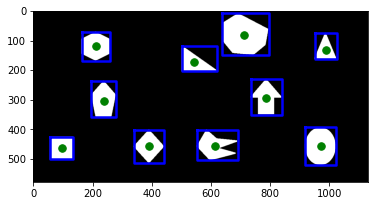

In [56]:
regions_propers = regionprops(labelled_img)
for region in regions_propers:
#     print('Eccentricity:',region.eccentricity)
    print('Centroid:' ,region.centroid)
    print('BBox',region.bbox)
    print('_'*10)

plt.figure(figsize=[16,20])
plt.subplot(131)
plt.title('Orginal image')
plt.imshow(img,'gray')
# ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh_img, 1, 2)
blank = np.zeros(thresh_img.shape[:2],dtype='uint8')
cv2.drawContours(blank, contours, -1,(255, 0, 0), 1)
plt.subplot(132)
plt.title('Contours')
plt.imshow(blank,'gray')


fig, ax = plt.subplots()
ax.imshow(thresh_img, cmap=plt.cm.gray)

for props in regions_propers:
    y0, x0 = props.centroid

    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

# ax.axis((0, 600, 600, 0))
plt.show()

## Q18

In [58]:
F = np.array([
    [-0.00310695,-0.0025646,2.96584],
    [-0.028094,-0.00771621,56.3813],
    [13.1905,-29.2007,-9999.79]
])



array([ 1.32993765e+00,  4.50194844e+01, -1.19422527e+04])

In [61]:
np.linalg.matrix_rank(F)

3

In [75]:
Ua, Da, Va = np.linalg.svd(F)
_Da =  np.zeros([3,3])
_Da[0,0] = Da[1]
_Da[1,1] = Da[2]
_Da


array([[0.17879964, 0.        , 0.        ],
       [0.        , 0.00212909, 0.        ],
       [0.        , 0.        , 0.        ]])

In [76]:
_F = Ua@_Da@Va

In [78]:
np.linalg.matrix_rank(_F)

2

In [79]:
X = np.array([343.53,221.70,1.0]).T
_F@X

array([-0.016428  , -0.26509613, -0.21503112])